This is a companion notebook to my blog post here: 
http://www.ryanglambert.com/blog/latent-semantic-indexing-how-i-built-pubmatchco

In [15]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from scipy.sparse.linalg import svds as SVDS
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import distance_metrics 
from sklearn.metrics.pairwise import pairwise_distances
import seaborn as sns

%matplotlib inline

Let's pretend we have 7 sentences to compare.  For simplicity let's assume that I've already removed stop words.  The original sentences could be.  
```
The bacon egg and cheese was there. 

Bacon goes well with egg and cheese. 

Bacon is not cheese.  

There are books about cheese.

I read books about cheese. 

I read books. 

You read books. 
```

Removing stop words plus a few to keep things simple for us.  

In [2]:
tweets = [
    "bacon egg cheese",
    "bacon egg cheese",
    "bacon cheese",
    "books read",
    "books",
    "books read",
    "cheese books read", 
]

###### Let's turn it into Term Document matrix format.  

In [66]:
a = np.array([[1, 1, 1, 0, 0],
             [1, 1, 1, 0, 0],
             [1, 0, 1, 0, 0],
             [0, 0, 0, 1, 1],
             [0, 0, 0, 1, 0],
             [0, 0, 0, 1, 1],
             [0, 0, 1, 1, 1.01]])

In [69]:
docs, eigen_roots, terms_T = SVDS(a, k=2)

##### Singular Value Decomposition

Now the documents are expressed in terms of frequencies of principal components.  But what are those principal components?  

Each of them (two vectors (columns)) are some linear combination of vectors that were from the original matrix.  

In [98]:
list_of_concepts = []
for principal_component in terms_T:
    concept_dict = {}
    for index, j in enumerate(principal_component):
        concept_dict[vectorizer.vocabulary_.keys()[index]] = j
    list_of_concepts.append(concept_dict)
list_of_concepts

[{u'bacon': -0.28018005933373846,
  u'books': -0.21409652622174102,
  u'cheese': 0.55190913485223669,
  u'egg': 0.65600340266150492,
  u'read': -0.37512351882374495},
 {u'bacon': 0.3492816987078497,
  u'books': 0.64009199656697879,
  u'cheese': 0.32175304837689683,
  u'egg': 0.36328165125375023,
  u'read': 0.48247896182235828}]

##### Let's convert this list of dictionaries back into a matrix with columns and rows that we can understand.  

In [87]:
docs

array([[-0.34899038,  0.50699665],
       [-0.34899038,  0.50699665],
       [-0.23652186,  0.38668253],
       [ 0.4848744 ,  0.23596811],
       [ 0.26332971,  0.12513656],
       [ 0.4848744 ,  0.23596811],
       [ 0.40114826,  0.45756351]])

##### Similarity between two documents

In [97]:
1 - pdist((docs[3, :],docs[6, :]))

array([ 0.76311482])

##### Lastly, what's the point of all of this if we don't use it to compare similarity of documents?  

In [83]:
a_quiver = np.concatenate((np.array([[0, 0],[0,0],[0,0],[0,0], [0,0], [0,0], [0,0]]), docs),axis=1)

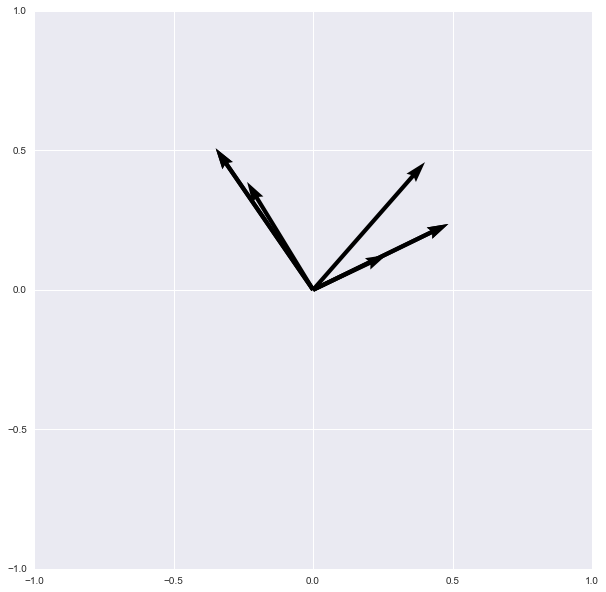

In [88]:
import numpy as np
import matplotlib.pyplot as plt

soa = a_quiver
X,Y,U,V = zip(*soa)
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.quiver(X,Y,U,V,angles='xy',scale_units='xy',scale=1)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
plt.draw()
plt.show()

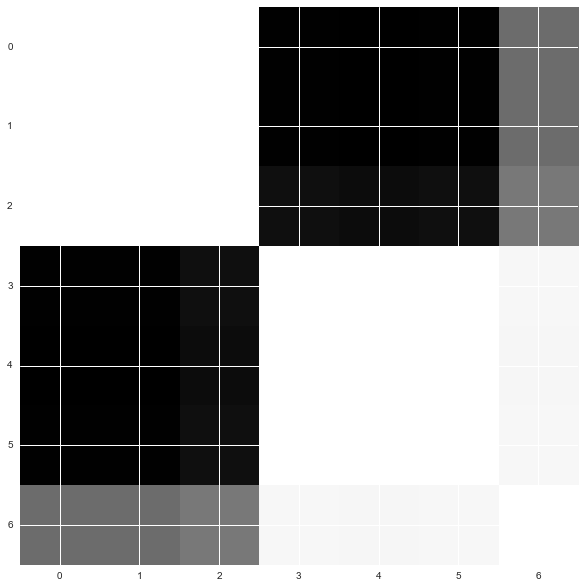

In [65]:
plt.figure(figsize= (10, 10))
plt.imshow(pairwise_distances(docs, metric='cosine'), interpolation='nearest')
plt.savefig('cosine_similarity_bacon_books.png')
plt.show()